In [1]:
import numpy as np
import sys, os, git
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'

level: level1 & tutorial name: lennard-jones-fluid


In [3]:
r = np.arange(0.5, 10, 0.001)
sig_11, sig_22 = 1.0, 3.0
eps_11, eps_22 = 1.0, 0.5
sig_12 = np.sqrt(sig_11*sig_22)
eps_12 = np.sqrt(eps_11*eps_22)
E11 = 4*eps_11*((sig_11/r)**12-(sig_11/r)**6)
E22 = 4*eps_22*((sig_22/r)**12-(sig_22/r)**6)
E12 = 4*eps_12*((sig_12/r)**12-(sig_12/r)**6)

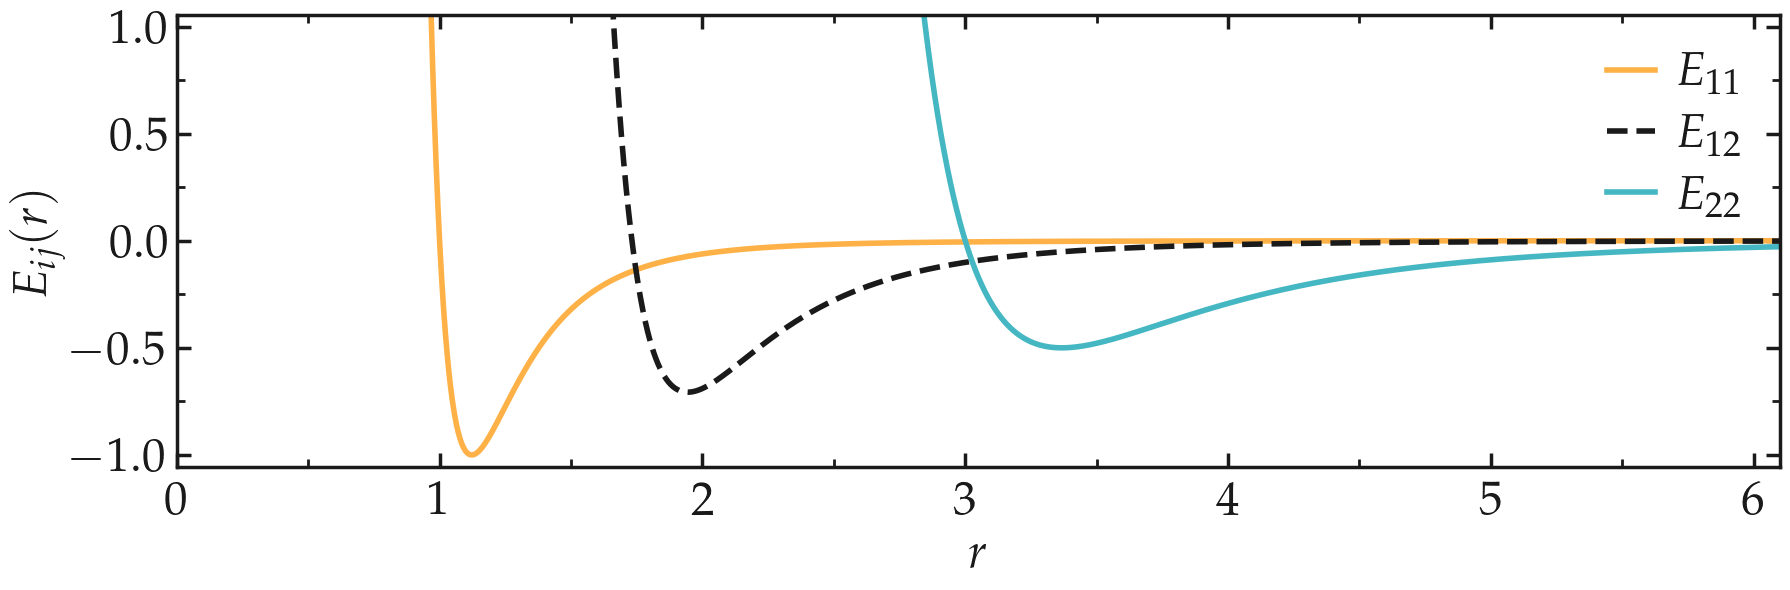

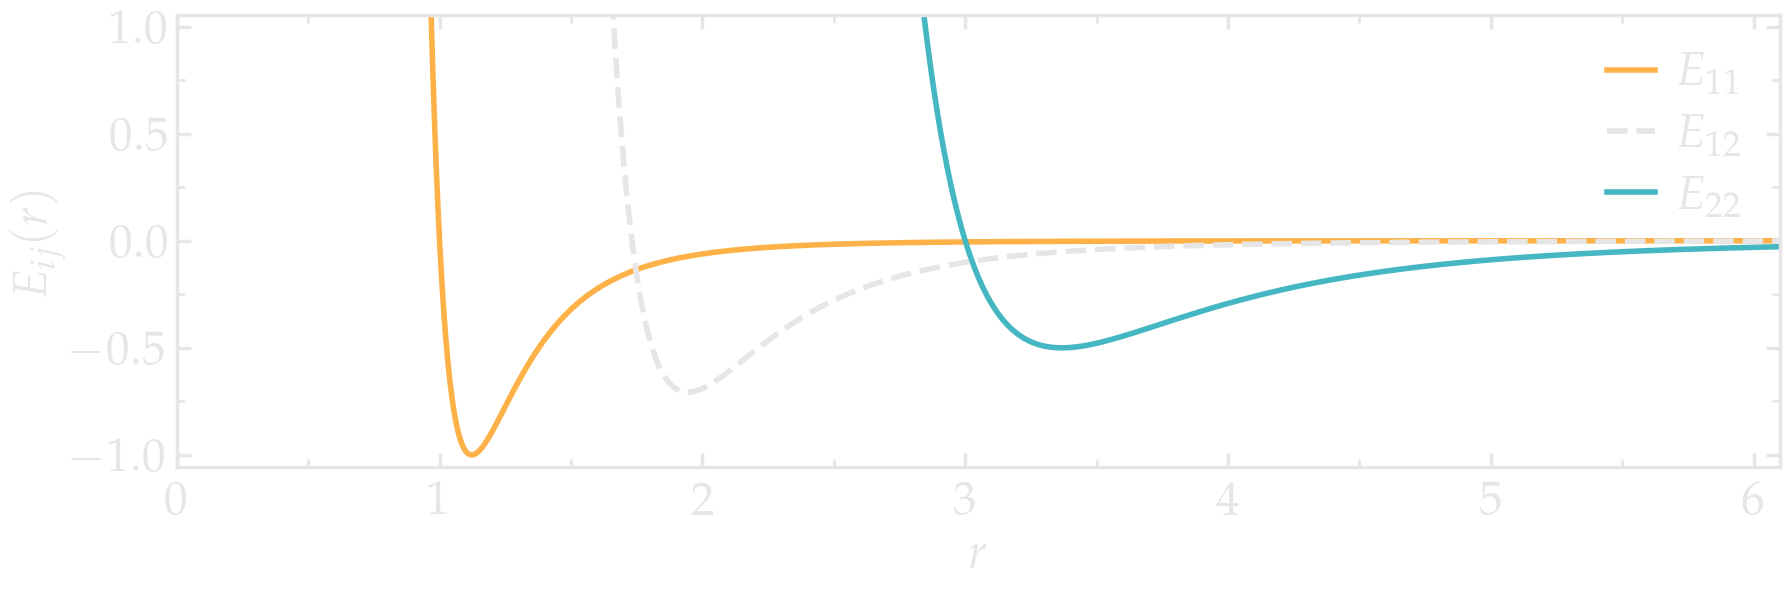

In [5]:
filename = "lennard-jones"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                        transparency = True, use_serif=True)
    myplt.add_panel()
    #myplt.add_plot(y = force_0[::4], x = length_0[::4], type = "plot",
    #                marker = "o", data_color = 1, markersize = 12)
    myplt.add_plot(x = r, y = E11, type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 1, markersize = 12,
                   data_label = r'$E_{11}$')
    myplt.add_plot(x = r, y = E12, type = "plot", linewidth_data = 3,
                   marker = "--", data_color = "autogray", markersize = 12,
                   data_label = r'$E_{12}$')
    myplt.add_plot(x = r, y = E22, type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = r'$E_{22}$')
    myplt.complete_panel(ylabel = r'$E_{ij} (r)$', xlabel = r'$r$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 6.1, 1), x_boundaries=(0, 6.1),
                         y_ticks=np.arange(-1., 1.25, 0.5), y_boundaries=(-1.055, 1.055))
    myplt.save_figure(filename = filename, saving_path = './')